In [2]:
# !pip install sentence-transformers

In [3]:
# !pip install hdbscan


In [4]:
# !pip install umap-learn

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sentence_transformers import SentenceTransformer
import hdbscan
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [6]:
df=pd.read_csv(r"C:\MMA\Winter 2025\INSY 695 - Production\Group Project\final_Clean_flattened_cleaned_Official_V2.csv")

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,job_id,industry_id,salary_id,currency_x,compensation_type_x,company_name,title,description_x,location,company_id,views,formatted_work_type,applies,remote_allowed,job_posting_url,application_type,formatted_experience_level,sponsored,work_type,compensation_type_y,normalized_salary,employee_count,follower_count,description_y,company_size,state,country,city,zip_code_y,address,url,industry,max_salary_in_usd,min_salary_in_usd,max_hourly_salary_in_usd,min_hourly_salary_in_usd,ListedDate,ListedTime,ExpieryDate,ExpieryTime,401(k),Child care support,Commuter benefits,Dental insurance,Disability insurance,Medical insurance,Paid maternity leave,Paid paternity leave,Pension plan,Student loan assistance,Tuition assistance,Vision insurance,CompApplication,full_description,cleaned_full_description,extracted_skills,combined_features,TitleClean
0,3884431523,56,3.0,USD,BASE_SALARY,Energy Fuels Inc,Mine Foreman,GENERAL PURPOSE:Under the general direction of...,Greater Flagstaff Area,947812.0,4.0,Full-time,0.0,0.0,https://www.linkedin.com/jobs/view/3884431523/...,ComplexOnsiteApply,Mid-Senior level,0.0,FULL_TIME,BASE_SALARY,110000.0,102.000000,2831.000000,Energy Fuels (NYSE MKT UUUU | TSX:EFR) is a le...,2.0,Colorado,US,Lakewood,80228,225 Union Blvd.,https://www.linkedin.com/company/energy-fuels-...,Mining,120000.0,100000.0,57.692308,48.076923,2024-04-05,19:35:01,2024-05-05,19:35:01,1,0,0,1,0,1,0,0,0,0,0,1,0,GENERAL PURPOSE:Under the general direction of...,purpose direction superintendent position vers...,"['education', 'equipment', 'state', 'developme...",[0. 0.02371779 0.06454172 0.61997699 0...,project manager
1,3884911725,12,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,4.0,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3884911725/...,SimpleOnsiteApply,Associate,0.0,FULL_TIME,BASE_SALARY,105000.0,24.500000,68099.500000,"Direct Sales Recruiting, LLC, where we bring m...",1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,200000.0,10000.0,96.153846,4.807692,2024-04-05,19:36:27,2024-05-05,19:36:26,0,0,0,0,0,0,0,0,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'plan', 'account', 'growth', 'employe...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,sales representative
2,3884911725,17,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,4.0,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3884911725/...,SimpleOnsiteApply,Associate,0.0,FULL_TIME,BASE_SALARY,105000.0,24.500000,68099.500000,"Direct Sales Recruiting, LLC, where we bring m...",1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,200000.0,10000.0,96.153846,4.807692,2024-04-05,19:36:27,2024-05-05,19:36:26,0,0,0,0,0,0,0,0,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'plan', 'account', 'growth', 'employe...",[0.04253479 0.06880609 0.09361883 0.62677572 0...,sales representative
3,3884911725,15,4.0,USD,BASE_SALARY,"Direct Sales Recruiting, LLC",Territory Sales - Medical Sales - Long Island,Territory Sales Manager - Medical Sales\nMy cl...,"Hempstead, NY",766849.0,4.0,Full-time,1.0,0.0,https://www.linkedin.com/jobs/view/3884911725/...,SimpleOnsiteApply,Associate,0.0,FULL_TIME,BASE_SALARY,105000.0,24.500000,68099.500000,"Direct Sales Recruiting, LLC, where we bring m...",1.0,NJ,US,Basking Ridge,07920,0,https://www.linkedin.com/company/direct-sales-...,Staffing and Recruiting,200000.0,10000.0,96.153846,4.807692,2024-04-05,19:36:27,2024-05-05,19:36:26,0,0,0,0,0,0,0,0,0,0,0,0,0,Territory Sales Manager - Medical Sales\nMy cl...,territory sale manager sale client leader devi...,"['need', 'pla

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39958 entries, 0 to 39957
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      39958 non-null  int64  
 1   industry_id                 39958 non-null  int64  
 2   salary_id                   39958 non-null  float64
 3   currency_x                  39958 non-null  object 
 4   compensation_type_x         39958 non-null  object 
 5   company_name                39958 non-null  object 
 6   title                       39958 non-null  object 
 7   description_x               39958 non-null  object 
 8   location                    39958 non-null  object 
 9   company_id                  39958 non-null  float64
 10  views                       39958 non-null  float64
 11  formatted_work_type         39958 non-null  object 
 12  applies                     39958 non-null  float64
 13  remote_allowed              399

In [9]:
unique_values = df.nunique()
print(unique_values)

job_id                        29040
industry_id                     378
salary_id                     29040
currency_x                        5
compensation_type_x               1
company_name                   9062
title                         20084
description_x                 27567
location                       3750
company_id                     9070
views                           481
formatted_work_type               7
applies                         201
remote_allowed                    2
job_posting_url               29040
application_type                  4
formatted_experience_level        7
sponsored                         1
work_type                         7
compensation_type_y               1
normalized_salary              6398
employee_count                 3850
follower_count                 7729
description_y                  9067
company_size                      8
state                           394
country                          42
city                        

In [10]:
df.columns.tolist()

['job_id',
 'industry_id',
 'salary_id',
 'currency_x',
 'compensation_type_x',
 'company_name',
 'title',
 'description_x',
 'location',
 'company_id',
 'views',
 'formatted_work_type',
 'applies',
 'remote_allowed',
 'job_posting_url',
 'application_type',
 'formatted_experience_level',
 'sponsored',
 'work_type',
 'compensation_type_y',
 'normalized_salary',
 'employee_count',
 'follower_count',
 'description_y',
 'company_size',
 'state',
 'country',
 'city',
 'zip_code_y',
 'address',
 'url',
 'industry',
 'max_salary_in_usd',
 'min_salary_in_usd',
 'max_hourly_salary_in_usd',
 'min_hourly_salary_in_usd',
 'ListedDate',
 'ListedTime',
 'ExpieryDate',
 'ExpieryTime',
 '401(k)',
 'Child care support',
 'Commuter benefits',
 'Dental insurance',
 'Disability insurance',
 'Medical insurance',
 'Paid maternity leave',
 'Paid paternity leave',
 'Pension plan',
 'Student loan assistance',
 'Tuition assistance',
 'Vision insurance',
 'CompApplication',
 'full_description',
 'cleaned_full_d

In [11]:
df['country'].value_counts()

country
US    35991
GB     1722
0       608
CA      327
FR      160
CH      156
IN      134
DE      134
OO      102
NL       97
SE       68
JP       64
IE       63
NO       47
DK       41
AU       35
SG       27
CN       26
BE       24
IL       21
IT       18
MX       12
ES       10
HK        9
BM        7
TW        7
LU        7
ZA        6
AE        6
AT        5
FI        5
MT        4
PA        3
NZ        2
HU        2
PR        2
BR        1
IS        1
KR        1
LB        1
KY        1
PK        1
Name: count, dtype: int64

# Cleaning pipeline for SVM and HDBSCAN

In [12]:
import pandas as pd

def filter_us_jobs(df):
    """Keeps only job postings from the US."""
    return df[df['country'] == 'US']

def extract_job_city(df):
    """Extracts the job city from the 'location' column."""
    df['job_city'] = df['location'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) and ',' in x else x)
    return df

def standardize_city_names(df):
    """Standardizes city names to remove duplicates and inconsistencies."""
    city_mappings = {
        "New York City Metropolitan Area": "New York",
        "San Francisco Bay Area": "San Francisco",
        "Los Angeles Metropolitan Area": "Los Angeles",
        "Brooklyn": "New York",
        "Dallas-Fort Worth Metroplex": "Dallas",
        "United States": None,  # Remove rows where city is just "United States"
        "California": None,  # Remove ambiguous state-level entries
    }
    
    df['job_city'] = df['job_city'].replace(city_mappings)
    
    # Drop rows where 'job_city' is now NaN (after replacements)
    df = df.dropna(subset=['job_city'])
    
    return df

def filter_cities_by_postings(df, min_postings=100):
    """Keeps only cities with more than `min_postings` job postings."""
    city_counts = df['job_city'].value_counts()
    valid_cities = city_counts[city_counts > min_postings].index
    return df[df['job_city'].isin(valid_cities)]

def save_data(df, output_filepath):
    """Saves the cleaned dataset to a CSV file."""
    df.to_csv(output_filepath, index=False)

def clean_job_postings_pipeline(df, output_filepath):
    """Full pipeline to clean job postings data."""
    # Cleaning steps
    df = filter_us_jobs(df)
    df = extract_job_city(df)
    df = standardize_city_names(df)
    df = filter_cities_by_postings(df, min_postings=100)

    # Saving cleaned data
    save_data(df, output_filepath)

    return df  # Returning the cleaned dataframe for further use

# Example usage
# Assuming `df` is already loaded
cleaned_df = clean_job_postings_pipeline(df, "cleaned_dataset.csv")

# Display the first few rows
print(cleaned_df.head())


C:\Users\melam\AppData\Local\Temp\ipykernel_38180\1818065908.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_city'] = df['location'].apply(lambda x: x.split(',')[0].strip() if pd.notnull(x) and ',' in x else x)
C:\Users\melam\AppData\Local\Temp\ipykernel_38180\1818065908.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_city'] = df['job_city'].replace(city_mappings)


        job_id  industry_id  salary_id currency_x compensation_type_x  \
4   3887473220           43        5.0        USD         BASE_SALARY   
10  3884435029           27       11.0        USD         BASE_SALARY   
18  3887467990           96       18.0        USD         BASE_SALARY   
19  3887467990           14       18.0        USD         BASE_SALARY   
22  3884434034           48       21.0        USD         BASE_SALARY   

                      company_name                             title  \
4               Motion Recruitment                   Project Manager   
10                          Aquent             Data Entry Specialist   
18                      Convergenz  Senior Financial Project Manager   
19                      Convergenz  Senior Financial Project Manager   
22  Wesbuilt Construction Managers         Assistant Project Manager   

                                        description_x  \
4   Our client, a financial services company, is l...   
10  Job Title:

In [13]:
cleaned_df['job_city'].value_counts()

job_city
New York            2613
Los Angeles          766
San Francisco        609
Dallas               459
Chicago              455
Seattle              453
Denver               426
San Diego            387
Atlanta              356
Boston               343
Washington           343
Austin               321
Houston              320
San Jose             315
Charlotte            284
Phoenix              262
Irvine               225
Sacramento           222
St Louis             205
Portland             202
Philadelphia         181
Miami                177
Raleigh              175
Tampa                174
Columbus             162
Minneapolis          161
Indianapolis         148
Orlando              134
Bellevue             134
Baltimore            127
Rochester            126
Sunnyvale            123
San Antonio          122
Kansas City          121
Louisville           118
Las Vegas            114
Nashville            113
Irving               111
Albany               110
Santa Clara     

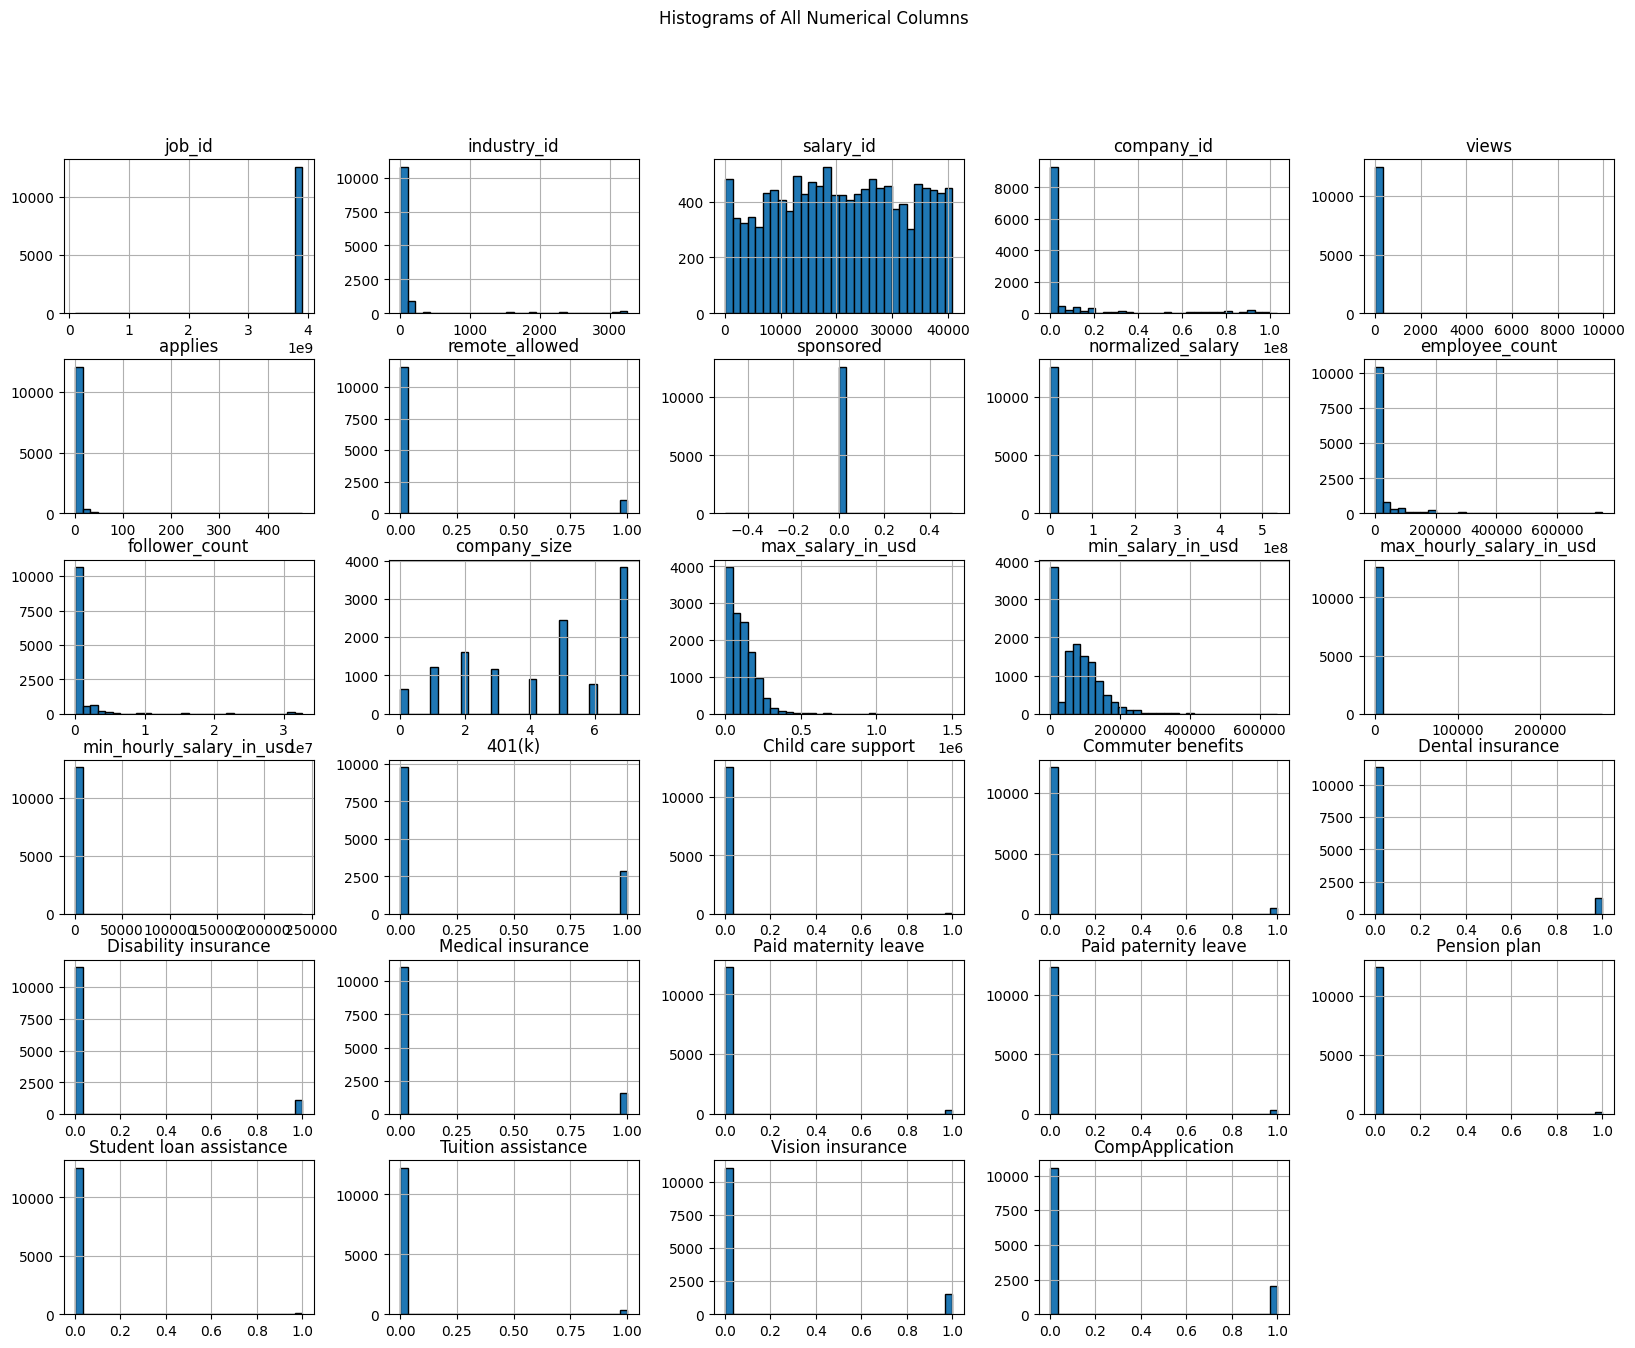

In [14]:
import matplotlib.pyplot as plt

# Plot histograms of all numerical columns
cleaned_df.hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of All Numerical Columns')  # Add a title to the figure
plt.show()

In [15]:
cleaned_df.describe()

,job_id,industry_id,salary_id,company_id,views,applies,remote_allowed,sponsored,normalized_salary,employee_count,follower_count,company_size,max_salary_in_usd,min_salary_in_usd,max_hourly_salary_in_usd,min_hourly_salary_in_usd,401(k),Child care support,Commuter benefits,Dental insurance,Disability insurance,Medical insurance,Paid maternity leave,Paid paternity leave,Pension plan,Student loan assistance,Tuition assistance,Vision insurance,CompApplication
count,1.262100e+04,12621.000000,12621.000000,1.262100e+04,12621.000000,12621.000000,12621.000000,12621.0,1.262100e+04,12621.000000,1.262100e+04,12621.000000,1.262100e+04,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.000000,12621.00000,12621.000000,12621.000000,12621.000000,12621.000000
mean,3.897464e+09,199.458918,20757.726091,1.022342e+07,24.210126,2.951113,0.081848,0.0,2.172880e+05,24417.461789,1.103208e+06,4.385706,1.052332e+05,73181.954458,118.154837,90.775979,0.224863,0.007131,0.037081,0.099041,0.085889,0.125822,0.028365,0.027415,0.01656,0.006735,0.030109,0.122653,0.162348
std,6.691529e+07,578.767263,11582.612442,2.325708e+07,192.534679,13.283012,0.274143,0.0,6.059166e+06,77611.574552,4.090734e+06,2.307955,1.022250e+05,64138.346687,3144.102711,2683.427332,0.417509,0.084147,0.188968,0.298729,0.280211,0.331662,0.166021,0.163295,0.12762,0.081792,0.170893,0.328051,0.368785
min,9.170073e+07,1.000000,5.000000,1.009000e+03,0.000000,0.000000,0.000000,0.0,1.850000e+01,0.000000,1.000000e+00,0.000000,7.250000e+00,1.000000,0.009135,0.000481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.895521e+09,16.000000,11094.000000,1.105600e+04,3.000000,0.000000,0.000000,0.0,6.890000e+04,144.000000,1.733567e+04,2.000000,7.500000e+01,62.000000,37.000000,28.846154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.901991e+09,44.000000,20654.000000,1.656020e+05,5.000000,0.000000,0.000000,0.0,1.025000e+05,1418.500000,8.737967e+04,5.000000,9.500000e+04,70246.000000,55.913462,40.865385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.904585e+09,96.000000,30411.000000,3.753860e+06,13.000000,1.000000,0.000000,0.0,1.453979e+05,13549.000000,4.480780e+05,7.000000,1.600000e+05,112000.000000,81.321154,59.471154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.906266e+09,3250.000000,40779.000000,1.034565e+08,9949.000000,472.000000,1.000000,0.0,5.356000e+08,748029.500000,3.266054e+07,7.000000,1.500000e+06,650000.000000,275000.000000,240000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [16]:
unique_values = cleaned_df.nunique()
print(unique_values)

job_id                        9066
industry_id                    298
salary_id                     9066
currency_x                       1
compensation_type_x              1
company_name                  3564
title                         7188
description_x                 8727
location                        94
company_id                    3565
views                          269
formatted_work_type              6
applies                        109
remote_allowed                   2
job_posting_url               9066
application_type                 3
formatted_experience_level       7
sponsored                        1
work_type                        6
compensation_type_y              1
normalized_salary             2693
employee_count                2079
follower_count                3425
description_y                 3563
company_size                     8
state                          142
country                          1
city                           706
zip_code_y          

# Full Preprocessing Pipeline - SVM & DBSCAN

In [17]:
### Step 1: Define Column Groups

# Numerical features
numerical_cols = ['normalized_salary', 'views', 'applies', 'employee_count', 'follower_count']

# Binary predictors (Excluded from HDBSCAN)
binary_cols = ['remote_allowed', 'Child care support', 'Commuter benefits', 'Dental insurance',
               'Disability insurance', 'Medical insurance', 'Paid maternity leave', 
               'Paid paternity leave', 'Pension plan', 'Student loan assistance', 
               'Tuition assistance', 'Vision insurance', 'CompApplication']

# Low-cardinality categorical features (for One-Hot Encoding)
categorical_cols = ['formatted_work_type', 'formatted_experience_level', 'application_type', 'job_city', 'TitleClean', 'industry']



In [18]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()

        # Ensure date columns are datetime
        X['ListedDate'] = pd.to_datetime(X['ListedDate'])
        X['ExpieryDate'] = pd.to_datetime(X['ExpieryDate'])

        # Days active (avoid division by zero)
        X['days_active'] = (X['ExpieryDate'] - X['ListedDate']).dt.days.replace(0, 1)

        # Derived engagement metrics
        X['views_per_day'] = X['views'] / X['days_active']
        X['applies_per_day'] = X['applies'] / X['days_active']

        # Salary difference percentage
        X['salary_diff_percentage'] = (X['max_salary_in_usd'] - X['min_salary_in_usd']) / X['min_salary_in_usd']
        X['salary_diff_percentage'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division errors

        # Apply log transformation to skewed numerical features
        log_transform_cols = ['views_per_day', 'applies_per_day', 'salary_diff_percentage'] + numerical_cols

        for col in log_transform_cols:
            if col in X.columns:
                X[col + '_log'] = np.log1p(X[col])  # log1p(x) = log(1 + x), avoids log(0) issue

        # Drop the original (non-log) numerical columns and EXCLUDE views_log, applies_log
        drop_cols = log_transform_cols + ['views_log', 'applies_log']
        X.drop(columns=drop_cols, errors='ignore', inplace=True)

        # Drop unnecessary columns
        extra_drop_cols = ['ListedDate', 'ExpieryDate', 'job_id', 'company_id', 'job_posting_url', 'address', 'url', 'zip_code_y']
        X.drop(columns=[col for col in extra_drop_cols if col in X.columns], errors='ignore', inplace=True)

        return X


In [19]:
# Apply Feature Engineering to get the transformed dataset
feature_engineering = FeatureEngineering()
cleaned_df = feature_engineering.transform(cleaned_df)

# Extract log-transformed numerical columns dynamically
log_numerical_cols = [col for col in cleaned_df.columns if col.endswith('_log') and col not in ['views_log', 'applies_log', 'views_per_day_log', 'applies_per_day_log']]

# 🚀 Step 1: Train-Test Split (Before Categorization)
X = cleaned_df.drop(columns=['views_per_day_log', 'applies_per_day_log'])  # Remove target column before split
y = cleaned_df['views_per_day_log']  # Raw log-transformed values as target (for now)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compute median from training data only
median_threshold = np.percentile(y_train, 50)  # 50th percentile (median)

# Apply the same categorization rules to BOTH train and test sets
def categorize_engagement(value):
    if value <= median_threshold:
        return 'low'
    else:
        return 'high'

# Convert train & test target using training-defined thresholds
y_train = y_train.apply(categorize_engagement)
y_test = y_test.apply(categorize_engagement)


C:\Users\melam\AppData\Local\Temp\ipykernel_38180\727462029.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['salary_diff_percentage'].replace([np.inf, -np.inf], 0, inplace=True)  # Handle division errors


In [20]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer


# StandardScaler for log-transformed numerical features
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale only log-transformed values
])

# One-Hot Encoding for low-cardinality categorical features
cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])



# Combine all transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, log_numerical_cols),  # ✅ Uses extracted log-transformed numericals
        ('cat', cat_transformer, categorical_cols)
    ]
)



In [21]:
# Apply Preprocessing Pipeline to Train and Test Separately
X_train_transformed = preprocessor.fit_transform(X_train)  # Fit & transform on train data
X_test_transformed = preprocessor.transform(X_test)  # Only transform test data (NO FIT!)

# Extract dynamically generated feature names
categorical_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)


# Generate correct column names dynamically
column_names = log_numerical_cols + \
               list(categorical_feature_names)

# Convert transformed arrays into DataFrames
X_train_transformed = pd.DataFrame(X_train_transformed, columns=column_names)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=column_names)

# Print final shape to confirm match
print(f"Training Set Shape: {X_train_transformed.shape}, Test Set Shape: {X_test_transformed.shape}")

Training Set Shape: (10096, 283), Test Set Shape: (2525, 283)


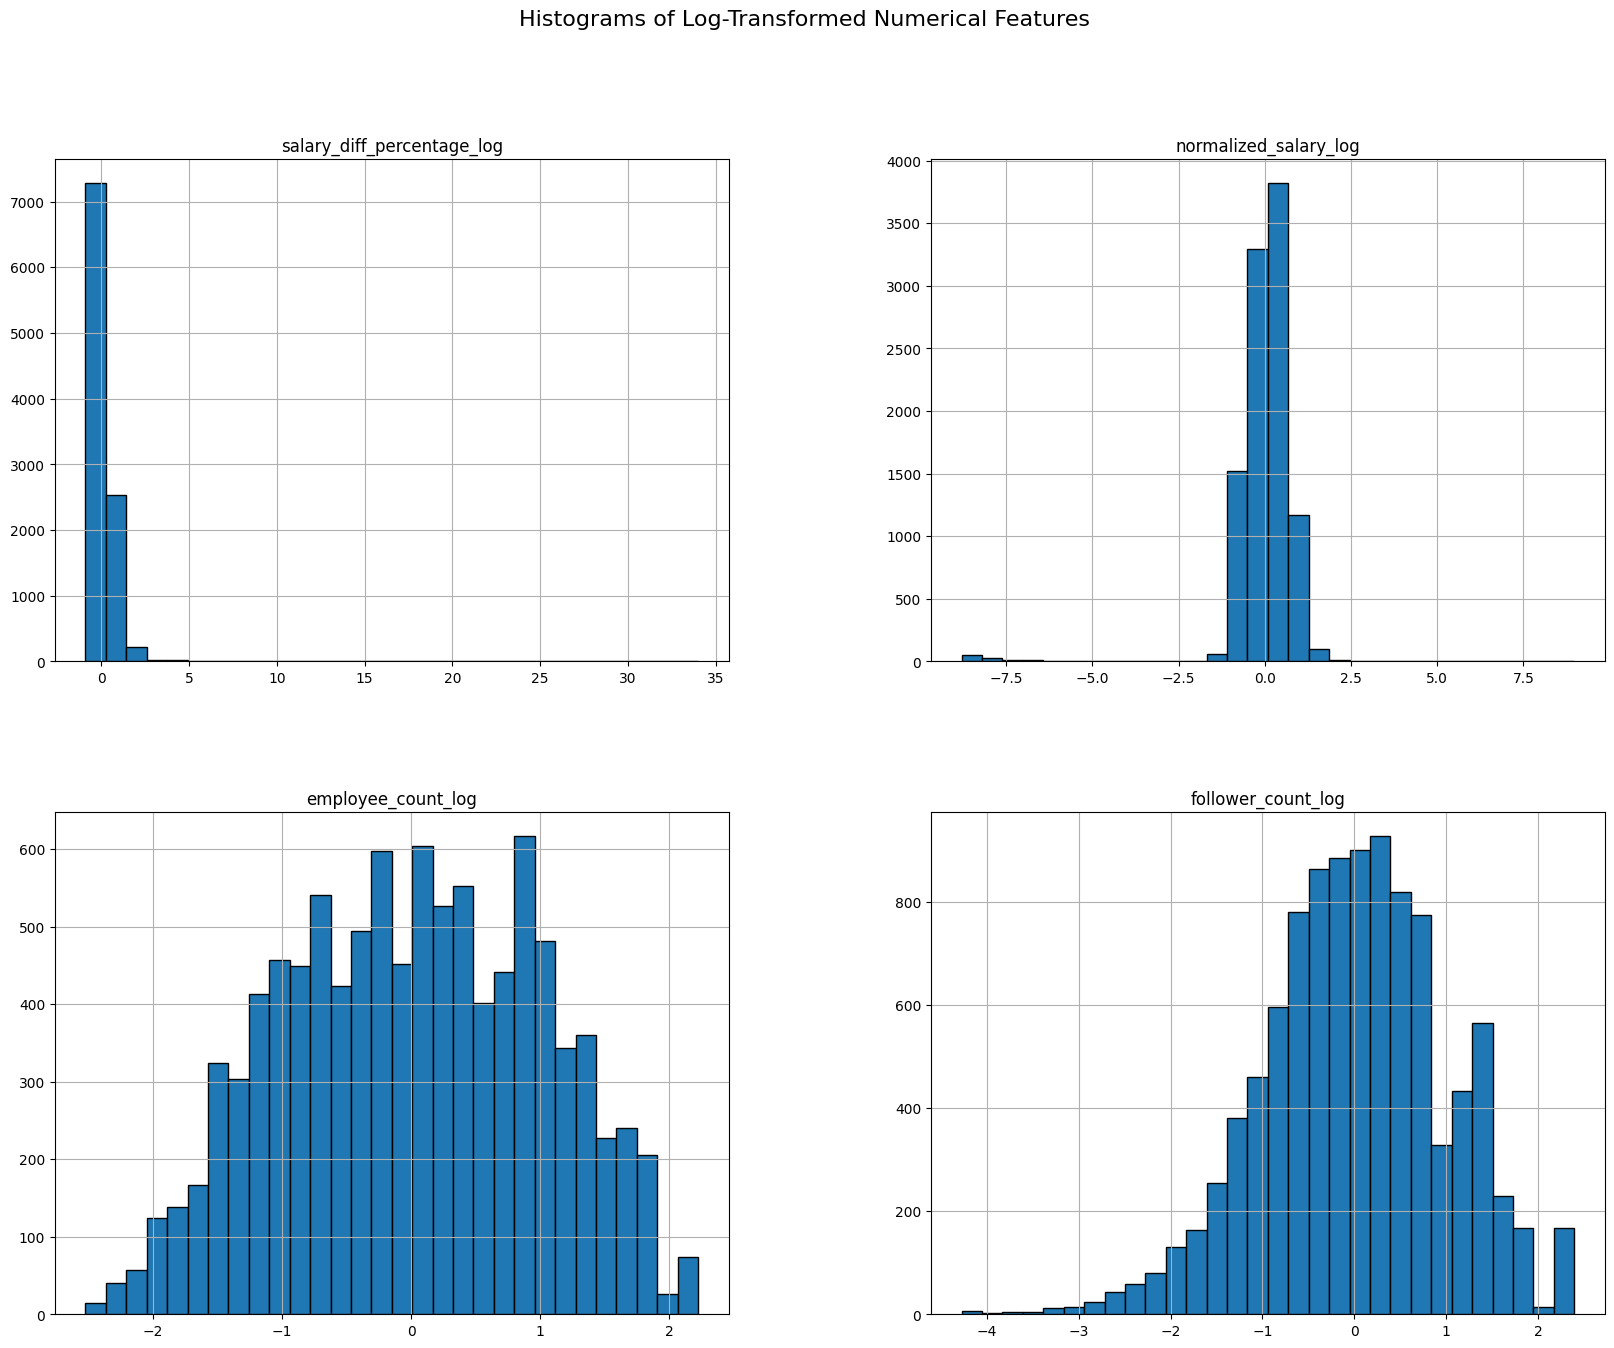

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms of log-transformed numerical columns
X_train_transformed[log_numerical_cols].hist(bins=30, figsize=(20, 15), edgecolor='black')
plt.suptitle('Histograms of Log-Transformed Numerical Features', fontsize=16)
plt.show()


# SVM

In [23]:
from sklearn.svm import SVC

# Initialize SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42, decision_function_shape='ovo')

from imblearn.over_sampling import SMOTE

# 🚀 Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_transformed, y_train)


In [ ]:

# Retrain SVM with balanced data
svm_model.fit(X_train_balanced, y_train_balanced)



In [23]:
from sklearn.metrics import classification_report, accuracy_score

# 🚀 Make predictions using transformed test set
y_pred = svm_model.predict(X_test_transformed)

# Print Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 SVM Accuracy: {accuracy:.4f}")

📊 Classification Report:
              precision    recall  f1-score   support

        high       0.56      0.62      0.59      1058
         low       0.70      0.65      0.67      1467

    accuracy                           0.64      2525
   macro avg       0.63      0.63      0.63      2525
weighted avg       0.64      0.64      0.64      2525

🔥 SVM Accuracy: 0.6356


In [24]:
# 🚀 Train with polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, class_weight='balanced', random_state=42)
svm_poly.fit(X_train_balanced, y_train_balanced)

from sklearn.metrics import classification_report, accuracy_score

# 🚀 Make predictions using transformed test set
y_pred = svm_poly.predict(X_test_transformed)

# Print Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 SVM Accuracy: {accuracy:.4f}")

📊 Classification Report:
              precision    recall  f1-score   support

        high       0.57      0.65      0.61      1058
         low       0.72      0.64      0.68      1467

    accuracy                           0.65      2525
   macro avg       0.64      0.65      0.64      2525
weighted avg       0.66      0.65      0.65      2525

🔥 SVM Accuracy: 0.6475


In [36]:
# 🚀 Adjust class weights manually based on class distribution
svm_model = SVC(
    kernel='rbf', 
    C=1.0, 
    gamma='scale', 
    class_weight={'high': 1.5, 'low': 1.0},  # Higher weight for underrepresented class
    random_state=42
)
svm_model.fit(X_train_transformed, y_train)


SVC(class_weight={'high': 1.5, 'low': 1.0}, random_state=42)

In [37]:
from sklearn.metrics import classification_report, accuracy_score

# 🚀 Make predictions using transformed test set
y_pred = svm_model.predict(X_test_transformed)

# Print Classification Report
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Print Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"🔥 SVM Accuracy: {accuracy:.4f}")

📊 Classification Report:
              precision    recall  f1-score   support

        high       0.54      0.73      0.62      1058
         low       0.74      0.55      0.63      1467

    accuracy                           0.63      2525
   macro avg       0.64      0.64      0.63      2525
weighted avg       0.66      0.63      0.63      2525

🔥 SVM Accuracy: 0.6277


## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 🚀 Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=200,  # Number of trees
    max_depth=None,  # Allow trees to fully grow
    min_samples_split=5,  # Minimum samples needed to split
    min_samples_leaf=2,  # Minimum samples per leaf
    class_weight='balanced',  # Handle class imbalance
    random_state=42,
    n_jobs=-1  # Use all processors for speed
)

# Train the model
rf_model.fit(X_train_balanced, y_train_balanced)
print("✅ Random Forest Training Complete!")


✅ Random Forest Training Complete!


In [28]:
# 🚀 Make predictions
y_pred_rf = rf_model.predict(X_test_transformed)

# Print Classification Report
print("📊 Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print Accuracy Scorey
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"🔥 Random Forest Accuracy: {accuracy_rf:.4f}")


📊 Random Forest Classification Report:
              precision    recall  f1-score   support

        high       0.69      0.65      0.67      1058
         low       0.76      0.79      0.77      1467

    accuracy                           0.73      2525
   macro avg       0.72      0.72      0.72      2525
weighted avg       0.73      0.73      0.73      2525

🔥 Random Forest Accuracy: 0.7319


In [38]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],  # More trees = better stability
    'max_depth': [None, 10, 20, 30],  # Limit tree depth
    'min_samples_split': [2, 5, 10],  # More conservative splits
    'min_samples_leaf': [1, 2, 5],  # Minimum data per leaf
}

# Run grid search
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                           param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

print(f"🔥 Best RF Parameters: {grid_search.best_params_}")

# Train optimized RF model
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_transformed)

# Evaluate
print("📊 Optimized RF Classification Report:")
print(classification_report(y_test, y_pred_best))


🔥 Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
📊 Optimized RF Classification Report:
              precision    recall  f1-score   support

        high       0.75      0.69      0.72      1058
         low       0.79      0.84      0.81      1467

    accuracy                           0.78      2525
   macro avg       0.77      0.77      0.77      2525
weighted avg       0.78      0.78      0.78      2525



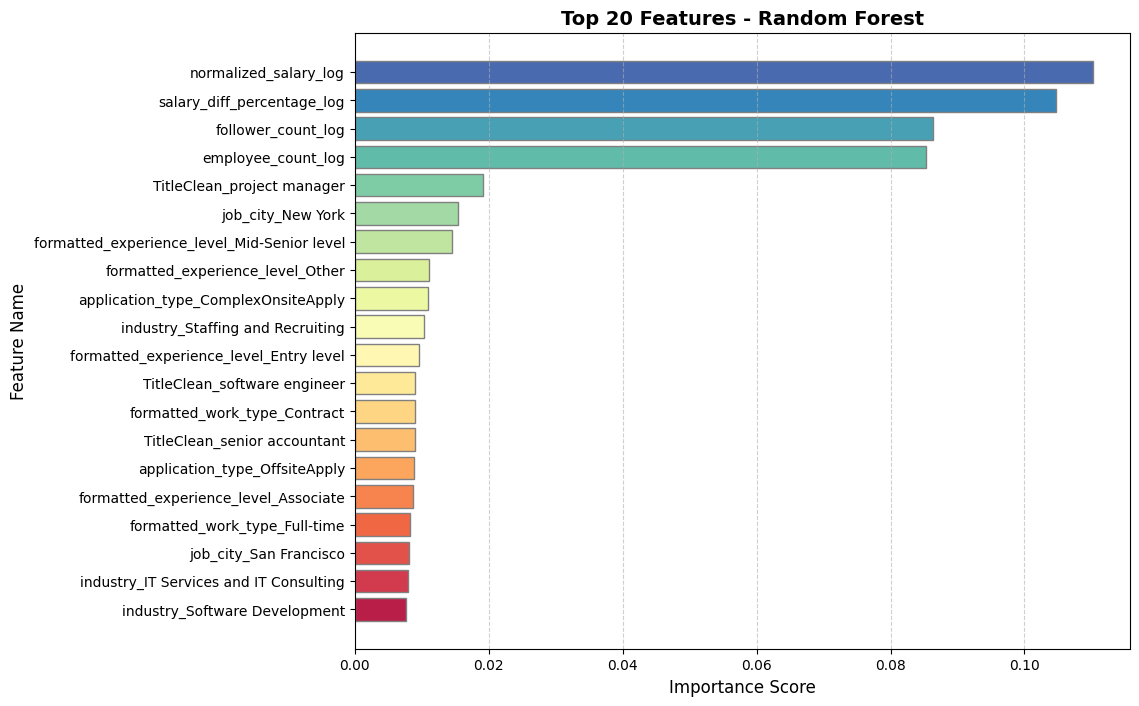

<Figure size 640x480 with 0 Axes>

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Extract feature importance
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train_transformed.columns)

# Sort and select top 20
top_features = feature_importance.sort_values(ascending=False).head(20)

# Create color gradient based on importance values
colors = sns.color_palette("Spectral", len(top_features))

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_features.index[::-1], top_features.values[::-1], color=colors, edgecolor='grey')

# Styling
plt.title("Top 20 Features - Random Forest", fontsize=14, fontweight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()

plt.savefig("feature_importance.png", dpi=300, bbox_inches='tight', transparent=True)


In [ ]:
# !pip install shap

  Using cached shap-0.46.0-cp312-cp312-win_amd64.whl.metadata (25 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
Using cached shap-0.46.0-cp312-cp312-win_amd64.whl (456 kB)
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)


In [ ]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 🔹 Manually reinitialize the best RF model with optimal hyperparameters
best_rf = RandomForestClassifier(
    n_estimators=100,  # Optimal value from GridSearchCV
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    class_weight='balanced',  # Keep this since balancing was used
    random_state=42
)

# ✅ Fit the model on the balanced training set
best_rf.fit(X_train_balanced, y_train_balanced)  

# 🔹 Initialize SHAP Explainer
explainer = shap.TreeExplainer(best_rf)

# 🔹 Compute SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# 🔥 SHAP Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values[1], X_test_transformed, feature_names=X_test_transformed.columns)


C:\Users\melam\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


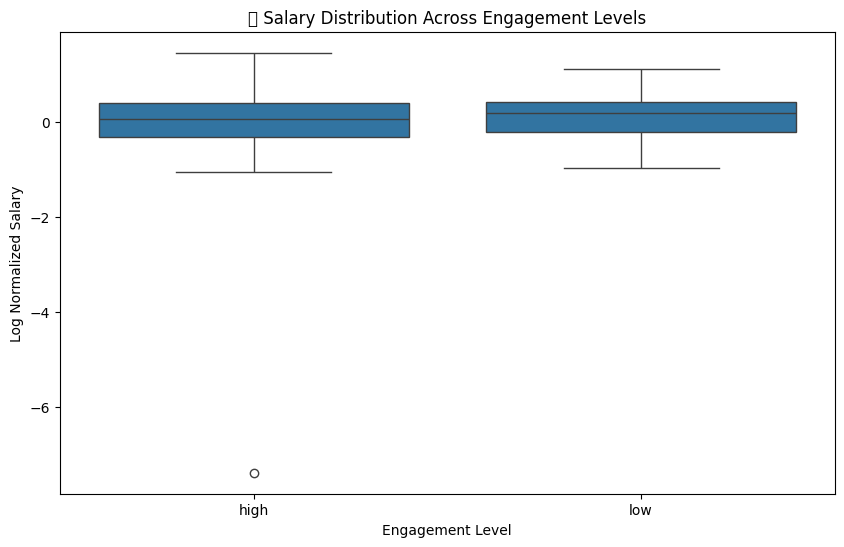

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Scatter plot of salary vs. engagement level
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=y_test, y=X_test_transformed['normalized_salary_log'])
# plt.title("Salary Distribution Across Engagement Levels")
# plt.xlabel("Engagement Level")
# plt.ylabel("Log Normalized Salary")
# plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reverse log transformation
cleaned_df["normalized_salary_original"] = np.expm1(cleaned_df["normalized_salary_log"])

# Plot salary distribution in original scale
plt.figure(figsize=(10, 6))
sns.boxplot(x=y_test, y=cleaned_df["normalized_salary_original"])
plt.title("🔥 Salary Distribution Across Engagement Levels (Original Scale)")
plt.xlabel("Engagement Level")
plt.ylabel("Original Salary")
plt.yscale("log")  # Use log scale to handle large salary differences
plt.show()


In [33]:
# city_engagement = cleaned_df.groupby("job_city")["views_per_day_log"].mean().sort_values(ascending=False)

# plt.figure(figsize=(12, 5))
# city_engagement.head(15).plot(kind="bar", color="dodgerblue")
# plt.title("🔥 Top 15 Cities with Highest Job Engagement")
# plt.xlabel("City")
# plt.ylabel("Average Log Views Per Day")
# plt.xticks(rotation=45)
# plt.show()


In [34]:
# title_engagement = cleaned_df.groupby("TitleClean")["views_per_day_log"].mean().sort_values(ascending=False)

# plt.figure(figsize=(12, 5))
# title_engagement.head(15).plot(kind="bar", color="coral")
# plt.title("🔥 Top 15 Job Titles with Highest Engagement")
# plt.xlabel("Job Title")
# plt.ylabel("Average Log Views Per Day")
# plt.xticks(rotation=45)
# plt.show()


In [35]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=cleaned_df["formatted_experience_level"], y=cleaned_df["normalized_salary_original"])
# plt.title("🔥 Salary vs. Experience Level")
# plt.xlabel("Experience Level")
# plt.ylabel("Log Normalized Salary")
# plt.xticks(rotation=45)
# plt.show()
